In [1]:
# importing the necessary module
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset
df= pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- No missing values are found

In [4]:
df.describe(
    include='all'
)

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- Newspaper data seems to have outlier datas as the mean and the max values are very far

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

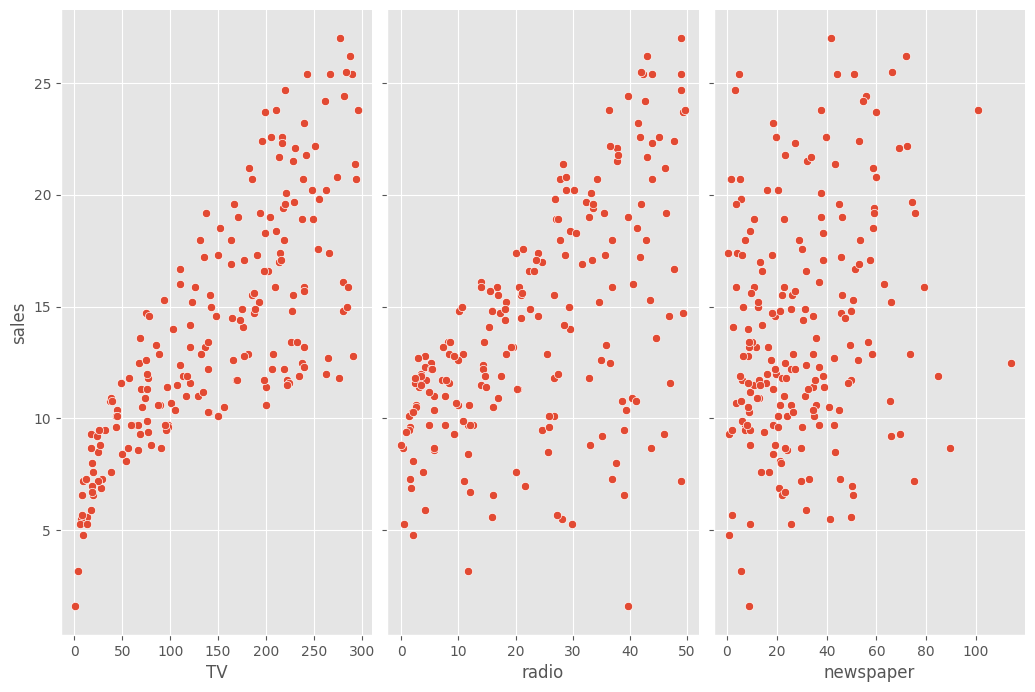

In [12]:
# Checking the relationship between different features and response variable
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars="sales", height=7, aspect=0.5)

- The values of the TV and sales seems to be in a linear kind of fashion, similarly for the radio
- The Newspaper has outlier values

In [ ]:
# Linear regression model building and estimating the coefficients
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split only 200 data  points 
# ideal case make a feature_columns list and feed into X but we have only 3 features to check and consider
X= df[['TV','radio', 'newspaper']]
y= df['sales']



# Instantiate the model and fitting the data
lm1= LinearRegression()
lm1.fit(X,y)

#print the coefficients
print('Intercepts: ', lm1.intercept_)
print('Coefficients: ', lm1.coef_)


Intercepts:  2.938889369459412
Coefficients:  [ 0.04576465  0.18853002 -0.00103749]


In [14]:
# pairing the features and the coefficients
list(zip(X.columns, lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820445),
 ('newspaper', -0.0010374930424763285)]

<Axes: >

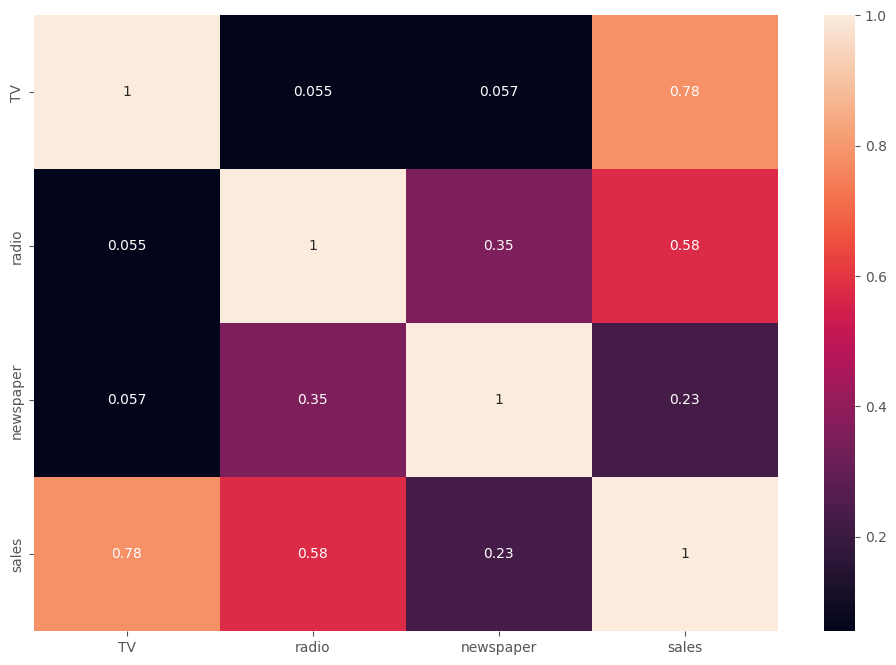

In [15]:
sns.heatmap(df.corr(), annot=True)

- Highest correlation is seen in between the TV and Sales and then followed  by Radio and the least is seen with Newspaper

In [16]:
# Feature selection based on correlation values
from sklearn. metrics import mean_squared_error, r2_score

lm2= LinearRegression().fit(X[['TV', 'radio']],y)
lm2_Pred= lm2.predict(X[['TV','radio']])

print('MSE: ', mean_squared_error(y, lm2_Pred))
print('R2 Score: ', r2_score(y, lm2_Pred))

MSE:  2.784569900338091
R2 Score:  0.8971942610828957


In [17]:
from sklearn. metrics import mean_squared_error, r2_score

lm3= LinearRegression().fit(X[['TV', 'radio','newspaper']],y)
lm3_Pred= lm3.predict(X[['TV','radio','newspaper']])

print('MSE: ', mean_squared_error(y, lm3_Pred))
print('R2 Score: ', r2_score(y, lm3_Pred))

MSE:  2.784126314510936
R2 Score:  0.8972106381789522


In [22]:
# Checking influence of Newspaper feature by using train/test split
from sklearn.model_selection import train_test_split

X= df[['TV', 'radio', 'newspaper']]
y= df['sales']

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

lm4= LinearRegression().fit(X_train, y_train)
lm4_Pred= lm4.predict(X_test)

print('MSE: ', mean_squared_error(y_test, lm4_Pred))
print('R2 Score: ', r2_score(y_test, lm4_Pred))



MSE:  1.9730456202283397
R2 Score:  0.9156213613792231


In [23]:
# Checking influence of Newspaper feature by using train/test split
from sklearn.model_selection import train_test_split

X= df[['TV', 'radio']]
y= df['sales']

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

lm5= LinearRegression().fit(X_train, y_train)
lm5_Pred= lm5.predict(X_test)

print('MSE: ', mean_squared_error(y_test, lm5_Pred))
print('R2 Score: ', r2_score(y_test, lm5_Pred))



MSE:  1.9262760418667428
R2 Score:  0.9176214942248907


c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


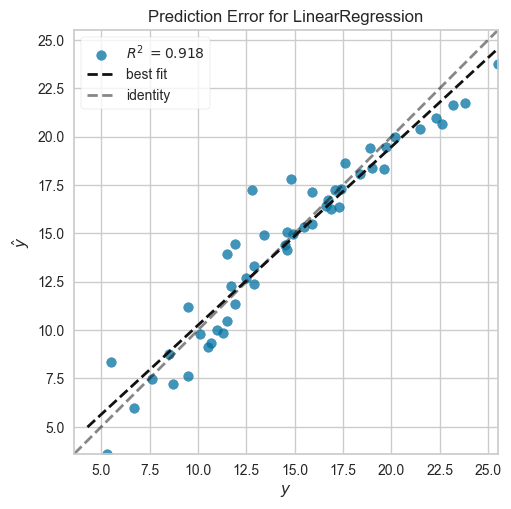

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer= PredictionError(lm5)

visualizer.fit(X_train, y_train) # fiting the training data
visualizer.score(X_test, y_test)
visualizer.poof()


c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


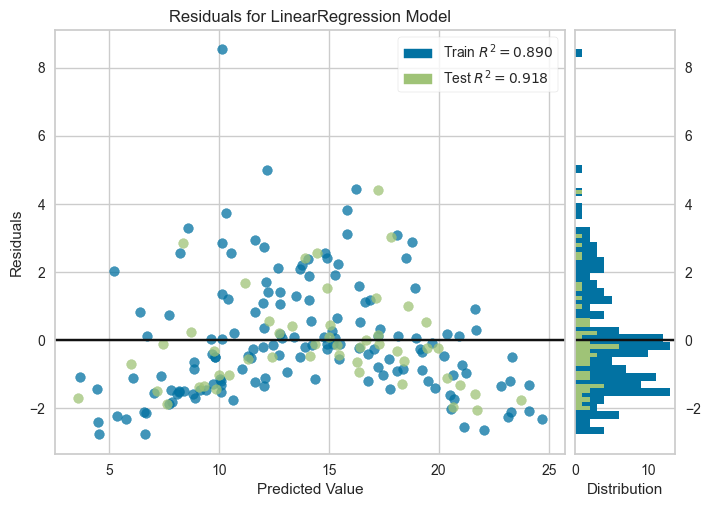

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [33]:
#  Lets check the synergy effect between TV and radio on sales

df['TV_radio']= df['TV']* df['radio']

X= df[['TV', 'radio','TV_radio']]
y=df['sales']

X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

lm6= LinearRegression().fit(X_train, y_train)
lm6_Pred= lm6.predict(X_test)

print('MSE: ', mean_squared_error(y_test, lm6_Pred))
print('R2 Score: ', r2_score(y_test, lm6_Pred))

MSE:  0.4916633684419818
R2 Score:  0.978973681468126


- There is a positive synergistic effect between TV and radio

c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


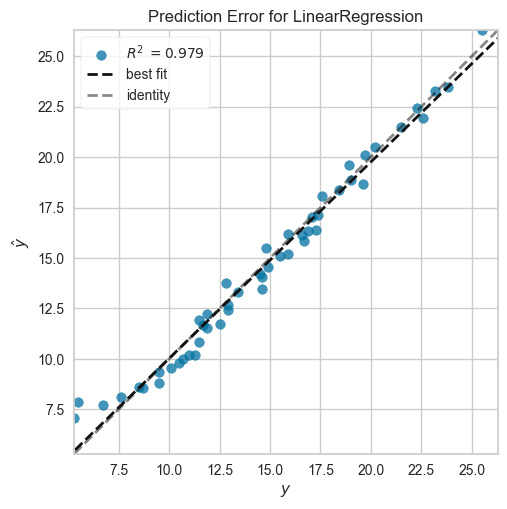

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
visualizer= PredictionError(lm6)

visualizer.fit(X_train, y_train) # fiting the training data
visualizer.score(X_test, y_test)
visualizer.show()
